# Assignment No :- 01

# Title :- 
# Predict the price of the Uber ride from a given pickup point to the agreed   drop-off location. Perform following tasks: 
# 1.  Pre-process the dataset. 
# 2.  Identify outliers. 
# 3.  Check the correlation. 
# 4.  Implement linear regression and random forest regression models. 
# 5.  Evaluate the models and compare their respective scores like R2, RMSE, etc. 
# Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 

# Name :- Shubham Jain

# Class :- BE-1

# Roll no :- 405A036

# Batch :- B

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0','key'], axis = 1)

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.shape

(200000, 7)

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)

In [14]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].median(), inplace=True)

In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [18]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Whenever we are performing parsing i.e converting into numeric, converting into datetime i.e changing the instance type
we can specify one of the 3 types of errors as arguements.
1. raise - default, If 'raise' then invalid parsing will raise an exception.
2. coerce - if 'coerce' then invalid parsing will be set as NaN.
3. ignore - if 'ignore' then invalid parsing will return the input downcast:[default None] 

In [19]:
df = df.assign(hour=df.pickup_datetime.dt.hour, day=df.pickup_datetime.dt.day, month=df.pickup_datetime.dt.month, year=df.pickup_datetime.dt.year, dayofweek=df.pickup_datetime.dt.dayofweek)

In [20]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [21]:
df = df.drop('pickup_datetime', axis=1)

In [22]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [23]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.772143;0.352273x0.107857)
pickup_longitude     AxesSubplot(0.547727,0.772143;0.352273x0.107857)
pickup_latitude         AxesSubplot(0.125,0.642714;0.352273x0.107857)
dropoff_longitude    AxesSubplot(0.547727,0.642714;0.352273x0.107857)
dropoff_latitude        AxesSubplot(0.125,0.513286;0.352273x0.107857)
passenger_count      AxesSubplot(0.547727,0.513286;0.352273x0.107857)
hour                    AxesSubplot(0.125,0.383857;0.352273x0.107857)
day                  AxesSubplot(0.547727,0.383857;0.352273x0.107857)
month                   AxesSubplot(0.125,0.254429;0.352273x0.107857)
year                 AxesSubplot(0.547727,0.254429;0.352273x0.107857)
dayofweek                  AxesSubplot(0.125,0.125;0.352273x0.107857)
dtype: object

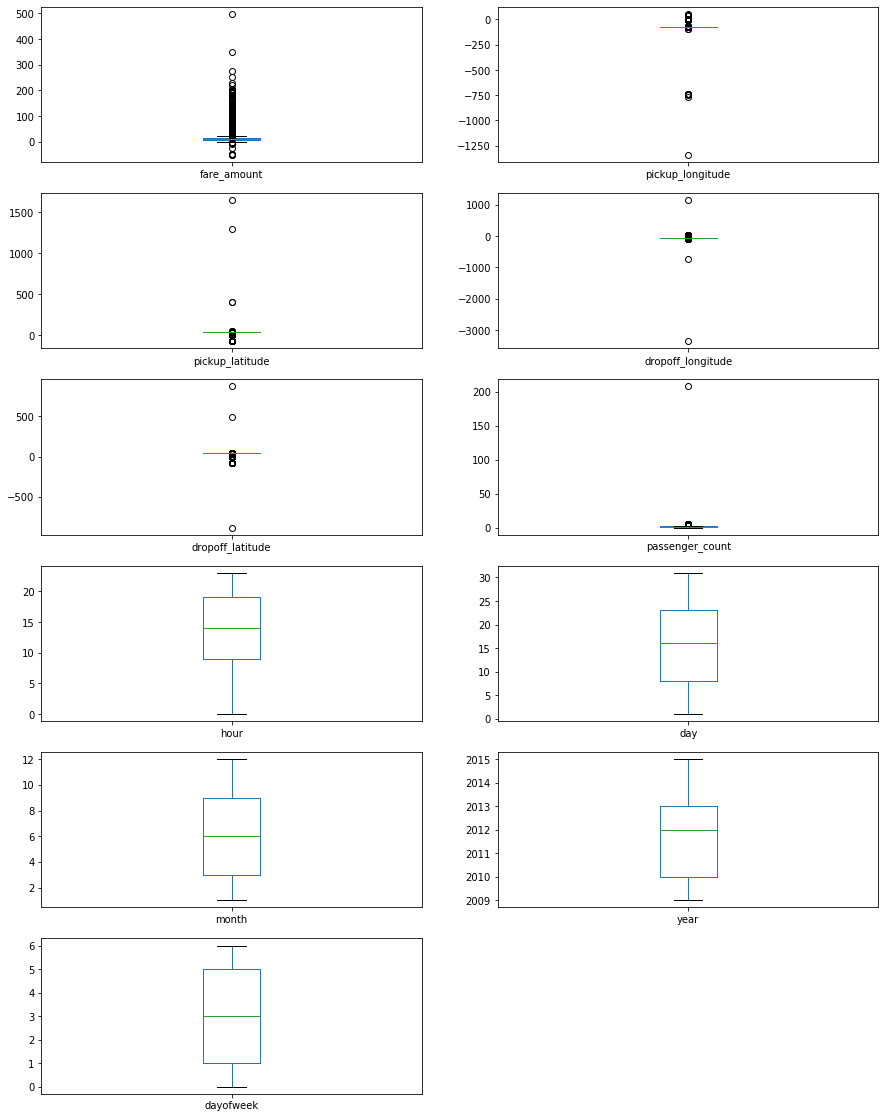

In [26]:
df.plot(kind="box", subplots=True, layout=(6,2), figsize=(15,20))

In [27]:
df.iloc[:, 0::]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [31]:
def remove_outliers(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

In [29]:
def treat_outliers(df1, col_list):
    for c in col_list:
        df1 = remove_outliers(df, c)
    return df1

In [32]:
df = treat_outliers(df, df.iloc[:, 0::])

fare_amount             AxesSubplot(0.125,0.772143;0.352273x0.107857)
pickup_longitude     AxesSubplot(0.547727,0.772143;0.352273x0.107857)
pickup_latitude         AxesSubplot(0.125,0.642714;0.352273x0.107857)
dropoff_longitude    AxesSubplot(0.547727,0.642714;0.352273x0.107857)
dropoff_latitude        AxesSubplot(0.125,0.513286;0.352273x0.107857)
passenger_count      AxesSubplot(0.547727,0.513286;0.352273x0.107857)
hour                    AxesSubplot(0.125,0.383857;0.352273x0.107857)
day                  AxesSubplot(0.547727,0.383857;0.352273x0.107857)
month                   AxesSubplot(0.125,0.254429;0.352273x0.107857)
year                 AxesSubplot(0.547727,0.254429;0.352273x0.107857)
dayofweek                  AxesSubplot(0.125,0.125;0.352273x0.107857)
dtype: object

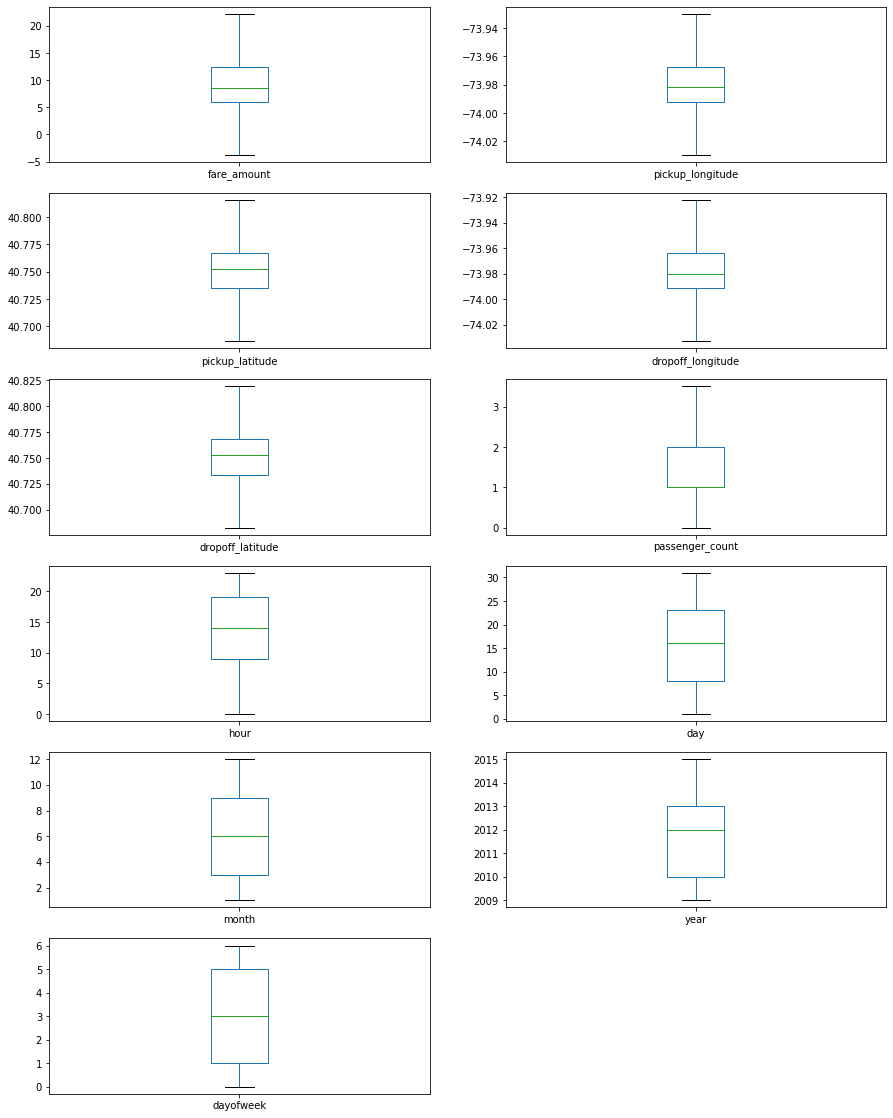

In [33]:
df.plot(kind="box", subplots=True, layout=(6,2), figsize=(15,20))

In [35]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [37]:
#Calculating Kilometers using haversine formula
import haversine as hs
travel_dist=[]
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = [df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)
print(travel_dist)
df['dist_travel_km']=travel_dist
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [38]:
df = df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]

In [39]:
df.shape

(200000, 12)

In [44]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) | (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) | (df.pickup_longitude > 180) | (df.pickup_longitude < -180) | (df.dropoff_longitude > 90) | (df.dropoff_longitude < -90)]

In [45]:
df.drop(incorrect_coordinates, inplace=True, errors='ignore')

In [46]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [47]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

In [50]:
df.shape

(200000, 12)

In [51]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125871,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.786377
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073311,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.048427
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515735,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.073383
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245665,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349,0.155208
dropoff_latitude,-0.125871,0.073311,0.515735,0.245665,1.000000,-0.006329,0.019764,-0.003499,-0.001190,-0.009595,-0.031932,-0.052657
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006329,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009912
hour,-0.023623,0.011579,0.029681,-0.046578,0.019764,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.035683
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003499,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001735
month,0.030817,0.001169,0.001562,0.002394,-0.001190,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010047
year,0.141277,0.010198,-0.014243,0.011355,-0.009595,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.022284


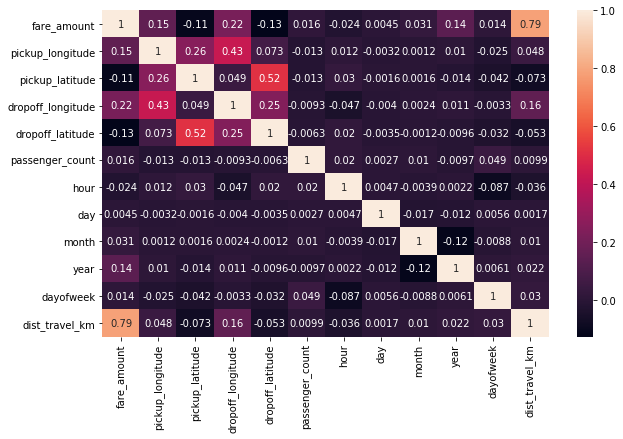

In [54]:
fig, axis = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
#light values means highly correlated

In [56]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month','year','dayofweek', 'dist_travel_km']]
y = df[['fare_amount']]

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [58]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [59]:
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
regression.coef_
#To find linear coefficient

array([[ 2.54446514e+01, -7.37368524e+00,  2.00097201e+01,
        -1.79268302e+01,  6.11738574e-02,  8.37971925e-03,
         3.21217593e-03,  5.90261347e-02,  3.68033791e-01,
        -3.04486923e-02,  1.84533995e+00]])

In [61]:
regression.intercept_
#To find linear intercept

array([3657.58537152])

In [62]:
prediction = regression.predict(x_test)
print(prediction)

[[10.10135268]
 [ 7.55405639]
 [10.21566942]
 ...
 [13.02292548]
 [ 7.14641157]
 [ 7.06635737]]


In [63]:
y_test

,fare_amount
91727,11.5
52563,8.5
64377,14.9
146539,6.0
102336,10.5
...,...
84354,18.5
151134,5.5
154386,13.3
12930,7.3


In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.6622765244199369

In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
mse
#lower the mse, the closer is forecast to actual

10.087401224629536

In [66]:
rmse = np.sqrt(mse)
rmse

3.176066942718547

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [69]:
rf.fit(x_train, y_train)

E:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
y_pred = rf.predict(x_test)
y_pred

array([12.2625,  7.19  , 10.8945, ..., 12.2815,  6.52  ,  5.424 ])

In [71]:
r2_random = r2_score(y_test, y_pred)
r2_random

0.7966793110929486

In [72]:
mse_random = mean_squared_error(y_test, y_pred)
mse_random

6.072948771922994

In [73]:
rmse_random = np.sqrt(mse_random)
rmse_random

2.4643353610908956

In [76]:
regression.score(x_test, y_test)

0.6622765244199369

In [77]:
rf.score(x_test, y_test)

0.7966793110929486